# Enhancing Foundation Models

Just like humans hallucinate (we call it “imagination”), Gen AI does too. Attempts to limit AImagination result in side effects such as catastrophic forgetting. We see this when fine-tuning, i.e., substantial changes are made to the model parameters with new data that it forgets what it learnt from older data, resulting in degraded performance.  Nevertheless, base FMs are being adapted in many ways. We summarize ~20 of these approaches here, citing relevant benchmark papers. Please answer the survey questions as you read.

The main reasons to enhance foundation models are:
1. Reduce costs
2. Reduce latency
3. Increase accuracy
4. Reduce unexpected behavior of FMs

In [1]:
from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
os.chdir('drive/My Drive')
os.chdir('Books_Writings/NLPBook/')

Mounted at /content/drive


In [2]:
%%capture
%pylab inline
import pandas as pd
import os
# !pip install ipypublish --quiet
# from ipypublish import nb_setup
from IPython.display import Image

## Scaling Laws

Scaling laws in AI refer to empirical relationships that describe how the performance of machine learning models, particularly neural networks, changes as key factors such as model size, dataset size, and computational resources are scaled up or down. These laws have significant implications for the development and efficiency of AI systems, especially large language models (LLMs).

**Key Concepts of Scaling Laws**

1. **Model Size and Performance**: Larger models generally achieve better performance on various tasks. This relationship is often characterized by power-law functions, where performance metrics like training loss improve as model parameters increase. Cross-entropy loss scales as a power-law with respect to model size, indicating that larger models are more sample-efficient. https://arxiv.org/abs/2001.08361, see [Figure 1](https://arxiv.org/pdf/2001.08361).

2. **Training Data Size**: The scaling relationship between model performance and dataset size is stronger than previously understood. Models like DeepMind's Chinchilla have shown that smaller models can outperform larger ones if trained on more high-quality data. https://arxiv.org/abs/2203.15556, see [Table 1](https://arxiv.org/pdf/2203.15556).

3. **Computational Resources**: As more computational resources (measured in FLOPs) are utilized, the training loss decreases more rapidly at lower levels of computation but slows down at higher levels. This suggests an optimal point where the allocation of computational resources can maximize efficiency. https://en.wikipedia.org/wiki/Neural_scaling_law shows the equations for various scaling laws.

4. **Overfitting and Generalization**: Scaling laws also provide insights into overfitting behavior as model and dataset sizes increase. Larger models tend to generalize better when trained with appropriate amounts of data, but there is a diminishing return on performance improvements beyond certain thresholds.

5. Scaling Laws matter for expanding the abilities of these models, affect resource management and sustainability, and tell us when scaling is no longer useful. The enhancements we will look at interact with these scaling laws, which are often [**power law**](https://en.wikipedia.org/wiki/Power_law) distributed.

6. Will scaling laws keep on giving? This is a huge current debate: https://arxiv.org/abs/2307.03201v2. Will scaling work (Dwarkesh podcast: https://www.dwarkeshpatel.com/p/will-scaling-work).

References:
- [1] https://www.larksuite.com/en_us/topics/ai-glossary/scaling-laws-for-large-language-models
- [2] https://sarahconstantin.substack.com/p/scaling-laws-for-ai-and-some-implications
- [3] https://openai.com/index/scaling-laws-for-neural-language-models/
- [4] https://en.wikipedia.org/wiki/Broken_Neural_Scaling_Law
- [5] https://www.oneusefulthing.org/p/scaling-the-state-of-play-in-ai
- [6] https://epochai.org/blog/scaling-laws-literature-review
- [7] https://arxiv.org/abs/2001.08361

My favorite reference on scaling laws is [this one](https://gwern.net/scaling-hypothesis), and I highly recommend it. [Gwern Branwen](https://gwern.net) is a superb writer.

What is the difference between train-time compute and test-time compute? [Ref: https://openai.com/index/learning-to-reason-with-llms/] How do LLMs scale with reference to scaling of both types of compute?

## Test-Time Scaling

Test-time scaling is a novel approach in AI that enhances model performance during inference without retraining. It involves allocating additional computational resources and time when the model is generating responses or performing tasks.

Key aspects of test-time scaling include:

1. Dynamic resource allocation: The model adjusts its behavior based on input complexity or system constraints, balancing accuracy and efficiency.

2. Extended reasoning time: Models can spend more time "thinking" about complex questions, leading to more accurate and thoughtful responses.

3. Step-by-step thinking: Techniques like Chain-of-Thought are employed, allowing the model to break down problems and reason through them systematically.

4. Budget forcing: This method controls the model's reasoning by setting maximum and/or minimum thinking tokens, encouraging deeper reflection before providing an answer.

5. Improved performance without increasing model size: Test-time scaling can enhance capabilities without necessarily expanding the number of parameters.

Test-time scaling represents a shift from traditional training-time scaling, focusing on optimizing how models use their existing knowledge rather than expanding their parameter count. This approach has shown promising results in complex reasoning tasks and is being explored by major AI labs as a new frontier in AI development.

References:

- https://huggingface.co/blog/Kseniase/testtimecompute
- https://arxiv.org/pdf/2501.19393.pdf
- https://www.forbes.com/sites/johnwerner/2024/11/26/computers-are-now-thinking-hard-next-level-ai-and-test-time-scaling/

## Sustainability

The social impact of AI revolves around issues of sustainabililty. Large model consume vast amounts of compute, first for training and then for inference.

Here is an article that is worth a read. Titled "QUANDARIES OF THE AI AGE: How Do We Confront the Environmental IMPACT?" (quoted from the National Geographic, November 2024.)  

"AI has a water problem—really, an energy problem. A significant amount of heat is generated by the energy required to power the AI tools that people are increasingly using in their daily personal and professional lives. This heat is released into data centers, which provide those AI systems the computational support and storage space they need to function. And, as Shaolei Ren, an associate professor of electrical and computer engineering at UC Riverside, is quick to note, **cooling down the data centers requires an enormous amount of water, similar to the amount used by tens of thousands of city dwellers**. (Emphasis added here and below.)

“When you use water for a shower, for example, it can be reused,” says Ren, whose research is focused on how to make AI more socially and environmentally responsible. “When water is evaporated to cool down a data center, it’s gone.” As lawmakers scramble to enact regulations and hold companies responsible for their energy and water use, Ren believes it will be important for us as individuals and as a society to better understand the real cost of asking an application like ChatGPT a question.

Even before the current AI boom, data centers’ water and energy demands had steadily increased. **In 2022, according to Google, its data centers used over five billion gallons of water, 20 percent more than in 2021; Microsoft used 34 percent more water companywide in 2022 than in 2021.**

AI stands only to compound the existing resource strain that data centers create on global energy grids: **In 2026, electricity consumption at data centers will be double the amount in 2022, the International Energy Agency says**. While the United States is just beginning to look at the environmental costs of data centers, the European Union’s energy commission pushed forward a regulation in March aimed at increasing transparency for data center operators and, ultimately, reducing fossil fuel dependence and resource waste.

“I explain it in terms my kid understands,” says Ren. **“If you ask ChatGPT [3] one question, it uses the same amount of energy as turning on the light—in our home, a four-watt LED bulb—for one hour. If you have a conversation with an AI, like ChatGPT, for 10 to 50 questions and answers, it will consume about 500 milliliters of water, or the size of a standard bottle of water.**” —Charley Locke

The electricity consumption of AI inference is significant and growing rapidly as AI models become more complex and widely used.

**Energy Consumption of AI Models**

- A single ChatGPT query is estimated to use about 0.00289 kilowatt-hours (kWh) of energy [2].
- This is roughly 10 times more energy than a traditional Google search query, which uses about 0.0003 kWh [2].

**Scale of Energy Usage**

- In January 2023, ChatGPT was consuming roughly as much electricity per month as 26,000 US households for inference alone [1].
- If Google were to run all its daily search queries (about 9 billion) through an AI model like ChatGPT, it would require approximately 26,010,000 kWh of energy per day [2].

**Comparison to Traditional Computing**

- Running Google's search queries through a ChatGPT-like model would consume about 9 terawatt-hours annually, which is 10 times more than current Google search energy usage [2].
- This is about 4% of all data center energy consumption in the US [2].

**Future Projections**

- By 2027, if current trends continue, NVIDIA alone could be shipping 1.5 million AI server units annually[3].
- These servers, if run at full capacity, would consume at least 85.4 terawatt-hours of electricity per year - more than the annual electricity consumption of many small countries [3].

**Efficiency Considerations**

- The energy cost of inference is generally higher than that of training. It's estimated that inference costs and power usage are at least 10 times higher than training costs [1].
- Researchers and companies are working on developing more energy-efficient AI architectures and hardware to mitigate the growing energy demands [1][4].

References:
- [1] https://www.numenta.com/blog/2023/08/10/ai-is-harming-our-planet-2023/
- [2] https://www.contrary.com/foundations-and-frontiers/ai-inference
- [3] https://www.scientificamerican.com/article/the-ai-boom-could-use-a-shocking-amount-of-electricity/
- [4] https://www.forbes.com/sites/bethkindig/2024/06/20/ai-power-consumption-rapidly-becoming-mission-critical/
- [5] https://www.reddit.com/r/aiwars/comments/1atckif/how_much_electricity_does_ai_generation_consume/
- [6] https://weightythoughts.com/p/lets-talk-about-ai-power-costs
- [7] https://www.sciencedirect.com/science/article/pii/S2210537923000124
- [8] https://www.thirdway.org/memo/how-ai-uses-energy

**Standard Enhancements**

We begin with the three common enhancements we are familiar with and then move on to several others that are showing promise.


## Retrieval Augmented Generation (RAG)  
https://arxiv.org/abs/2208.03299. A common way of thinking about this is known as “context engineering”. What can we retrieve and feed the LLM to focus on in crafting a response? This can be used standalone and combined with fine-tuning, next. The benefit of RAG is that it does not tamper with the original model. RAG uses a chosen embedding model and it can be difficult to adapt as all items in the vector store need reworking if we want to change the embedder.



## Fine-tuning ((self) supervised).

http://arxiv.org/abs/1909.08593. We may choose to use a corpus of documents to further train an LLM, using masked language modeling (self-supervised) where it learns specific additional things with new text. The fine-tuning may also be supervised (SFT) where text and response pairs are provided. Both can lead to catastrophic forgetting, but does not require additional ongoing infrastructure that RAG needs. (This is debatable as retraining/re-tuning LLMs is likely to be required.)



## Reinforcement Learning with Human Feedback (RLHF)

http://arxiv.org/abs/2203.02155. It is worth taking an intuitive look at the internals of the RLHF procedure (in the OpenAI paper). Step 1 is straight up SFT using sets of queries and responses prepared by humans. In Step 2 the LLM generates four responses, which are ranked by a human (ordinal rewards), and the dataset is used to train a neural net (the reward model) to predict/rank best responses. Step 3 exploits the fact that if you have a reward model, then you can replace the human in the loop and then just use a set of queries to get responses that can be evaluated by the reward model. This is just plain RL and OpenAI used the PPO (proximal policy optimization, a particular type of actor-critic RL model) algorithm to tune/train the LLM, which is now treated as if its neural net is a policy function that generates chunks of text. The main graphic from the OpenAI paper is shown here:


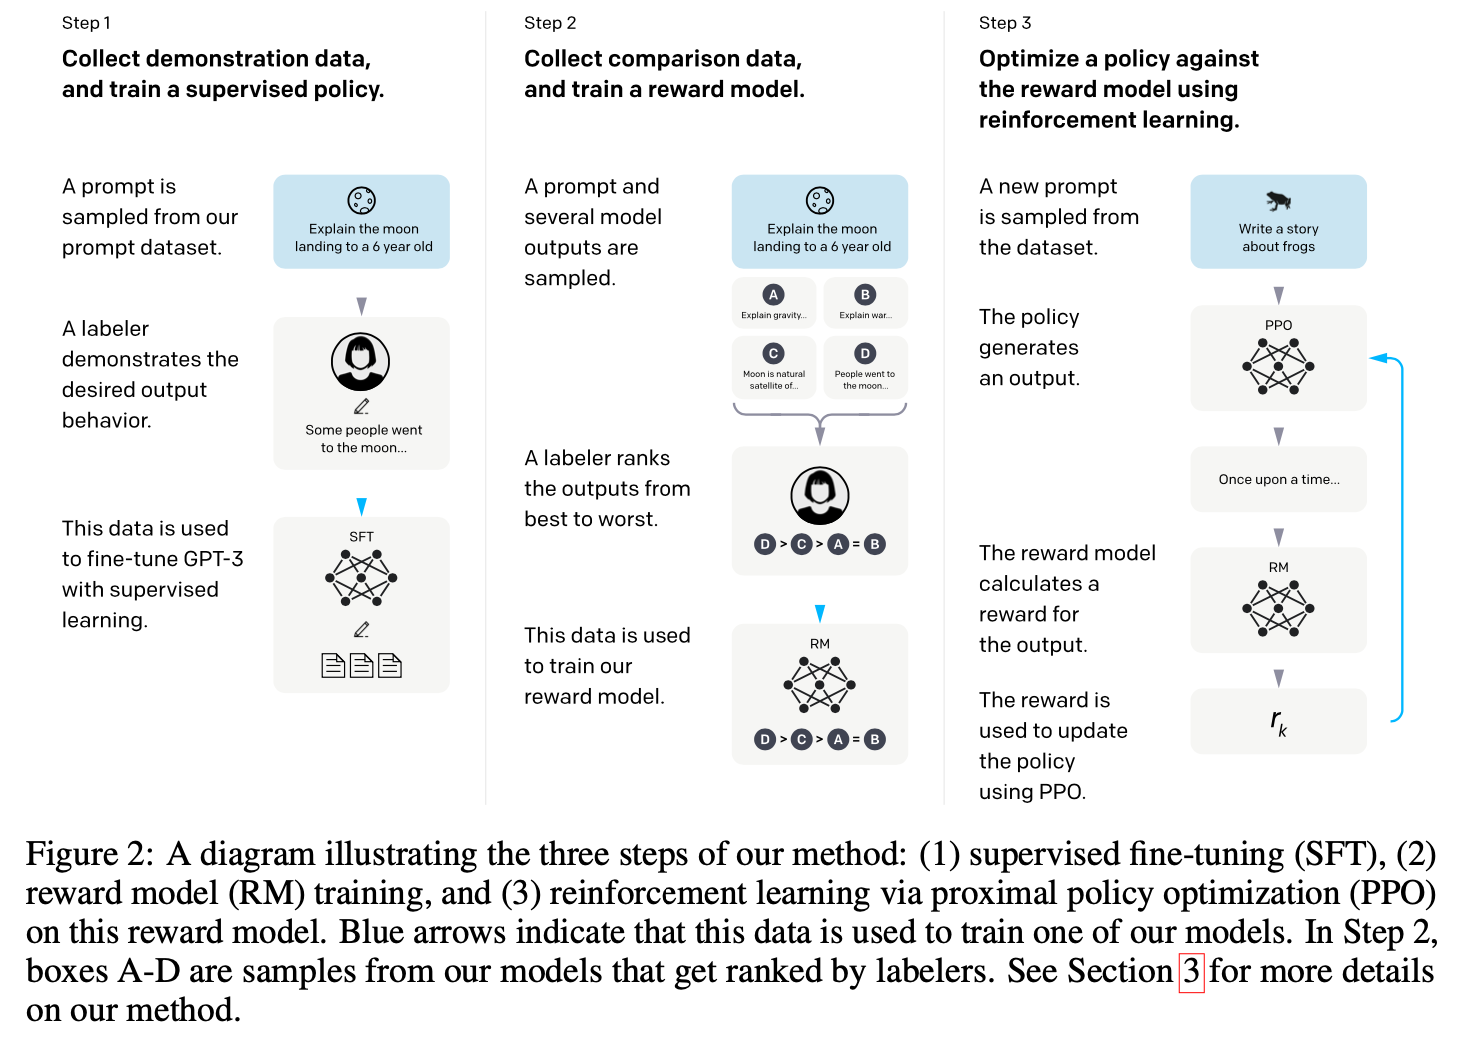

In [3]:
Image('NLP_images/rlhf.png', width=800)

Why not just use SFT and not RLHF? SFT uses an entropy loss function at the token level, whereas RLHF elevates this to the response level and seems to work better. How is “better” measured?

In the InstructGPT paper, a 175B GPT model is fine-tuned (Step 1 above) as a benchmark. It is compared against GPT (non-tuned) and RLHF (PPO). The results on the left show that RLHF elicits the best win rate against GPT-SFT (which beats un-tuned GPT).

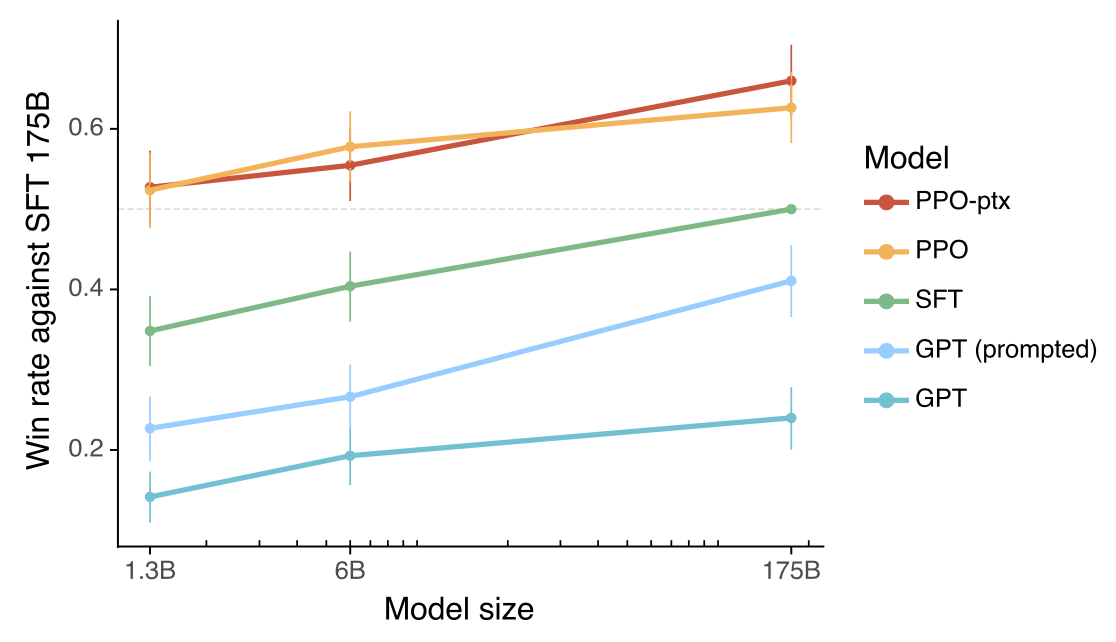

In [4]:
Image('NLP_images/rlhf_winrate.png', width=800)

Note: You may find this a bit strange because the win rate is decided by the humans who generated the reward model, which is used to improve RLHF putting the SFT model at a disadvantage. We may think of this as “training leakage”. However, if the goal is “alignment” then this may be an acceptable comparison.

RLHF Steps in Llama2 (https://arxiv.org/abs/2307.09288) are somewhat different from the InstructGPT paper.

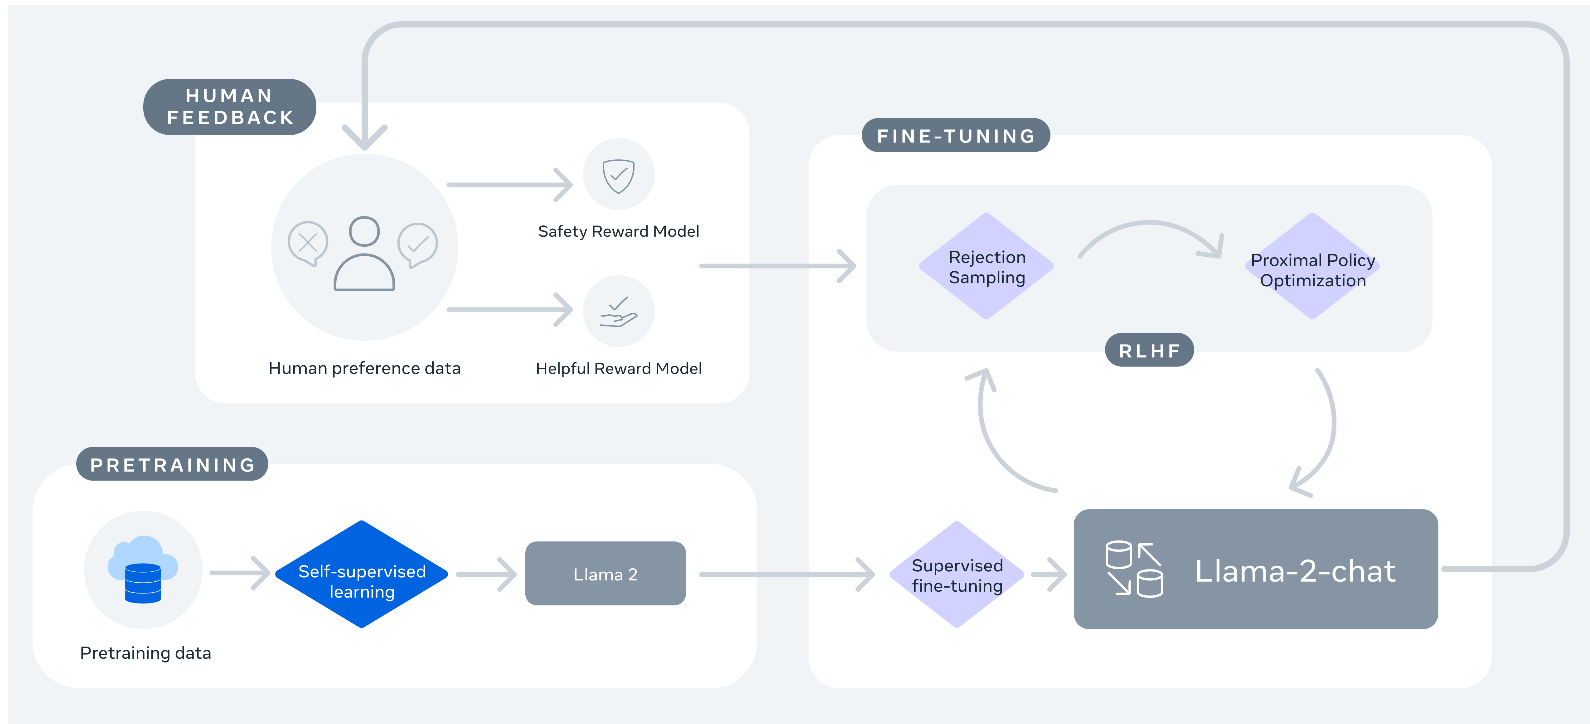

In [5]:
Image('NLP_images/rlhf_llama2.png', width=800)

Differences between RLHF in Llama2 and GPT-4:
- (1) The reward model in Llama2 has two types of reward, a “safety” reward model to manage toxicity, etc., and a “helpful” reward model that is similar to the one in InstructGPT.
- (2) In addition to reward maximization using PPO, there is also a rejection sampling step. What is rejection sampling? = only use examples that have high rewards for gradient updates and reject examples with low rewards.
- (3) In developing the reward model, human labelers see only two responses for ranking, not four ranked responses (as used by OpenAI). So this is a binary ranking task and the human is also asked to provide a margin label, which is a continuous value expressing their quantification of the difference in quality of the two responses.
- (4) Cross entropy based loss is used to train the reward model using PPO (in both InstructGPT and Llama2-chat). Because of the margin label from 3 above, the loss function is modified in Llama2-chat to contain a regularization term on the margin label. A combination of PPO and rejection sampling gives incrementally better results than standard RLHF.

Q: Which of the following options offers the best tradeoff between catastrophic forgetting (degrading accuracy) and reduction in hallucinations? (Keep in mind that more adaptation means more forgetting.)
1. RAG
2. Fine-tuning (self-supervised and instruct-tuning)
3. RLHF

Q: Is it possible to combine RAG with RLHF?
1. Yes
2. No
3. Not sure


Now, we move on to **Newer Innovations to Enhancing LLMs**


## Direct Preference Optimization (DPO).

https://arxiv.org/abs/2305.18290 (from Stanford). RLHF is a [complex and unstable](https://www.interconnects.ai/p/rlhf-lit-review-1-and-missing-pieces) procedure because of PPO (basically RL is notoriously difficult to implement well), (i) fitting a reward model that reflects the human preferences, and (ii) then fine-tuning using RL to maximize the estimated reward without drifting too far from the original model, is a hard act to pull off well. Instead, DPO avoids RL and solves a classification problem on the human preference data directly.


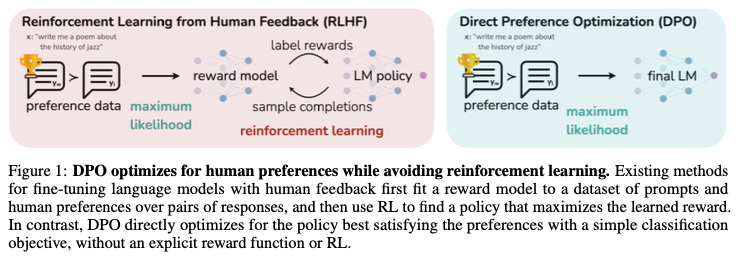

In [6]:
Image('NLP_images/dpo.png', width=800)

Direct Preference Optimization (DPO), is stable, performant, and computationally lightweight, eliminating the need for fitting a reward model,
sampling from the LM during fine-tuning, or performing significant hyperparameter tuning.

The results are exciting and dDPO-tuned Zephyr-7B (https://huggingface.co/HuggingFaceH4/zephyr-7b-alpha) beat Llama2-70B RLHF-tuned. Interesting extensions with Contrastive Preference Learning (https://arxiv.org/abs/2310.13639) and Rejection Sampling (https://arxiv.org/abs/2309.06657) are emerging as well.

**Contrastive Learning** is based on an objective function that minimizes distance between similar points and maximizes distance between dissimilar points in high-dimensional space. Ref: https://www.v7labs.com/blog/contrastive-learning-guide

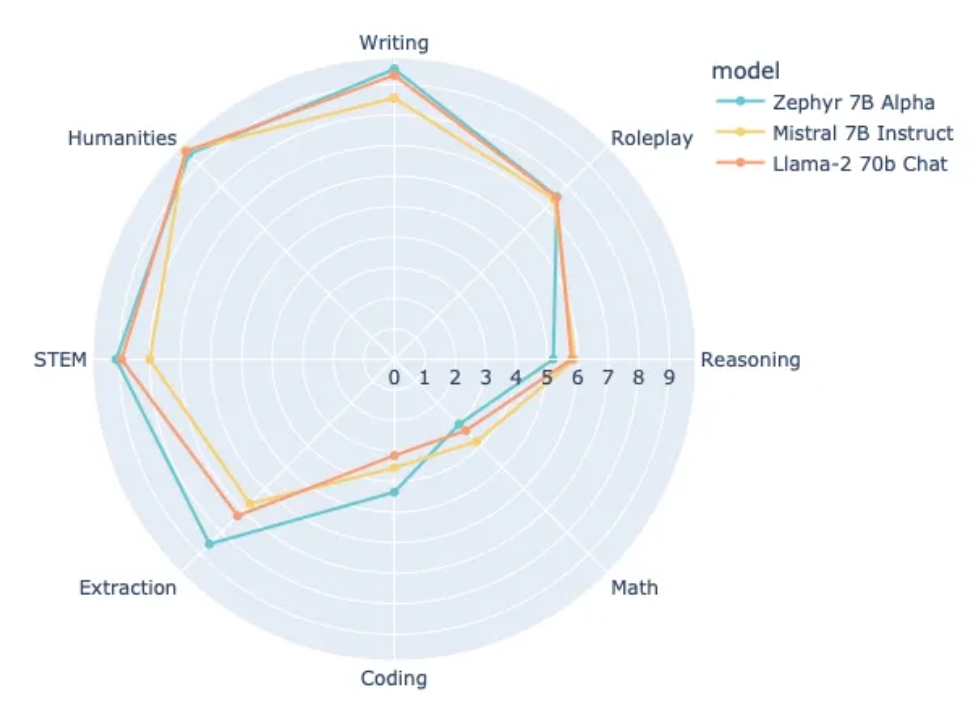

In [7]:
Image('NLP_images/zephyr7b.png', width=700)

Q: Will DPO and its variants eventually outpace RLHF as an enhancement technique for FMs?
1. Yes
2. No

## Thought Preference Optimization (TPO)

https://arxiv.org/abs/2410.10630. In October 2024, Meta introduced TPO, which is novel approach to improving the performance of LLMs as an enhancement to DPO. The basic idea is presented in tis figure from the paper:

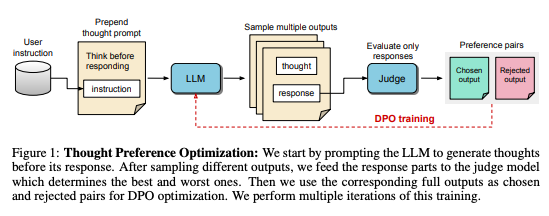

In [8]:
Image('NLP_images/tpo.png', width=800)

This is an example of self reflection that is used for training. The method beats other comparable models as shown in this table from the paper.

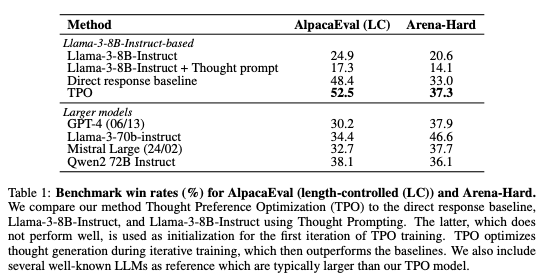

In [9]:
Image('NLP_images/tpo_results.png', width=800)

## Adapters/PEFT

Parameter Efficient Fine-Tuning (PEFT). Original paper: https://proceedings.mlr.press/v97/houlsby19a.html. LLM Adapters: http://arxiv.org/abs/2304.01933. The first paper introduced the idea of “adapters” in 2019 (pre LLMs).  The latter paper introduces a family of LLM-Adapters (Q2 2023). The idea of an adapter is to add a few layers to the original LLM which are tuned separately for a task without modifying the original LLM weights (think of it as a “sidecar” to the original LLM). This is not really new as transfer learning already added sequential layers to BERT as adapters. But sequential is not always ideal for LLMs, and we now have series and parallel adapters, as well as prefix tuning (https://aclanthology.org/2021.acl-long.353/). Low-rank adapters (LoRA, http://arxiv.org/abs/2106.09685) are a special version of a parallel adapter with fewer parameters (think of it as a parallel neural net with deterministic dropout (based on low-rank factorization) to get a low rank weight matrix). More efficiency is gained from quantization to get QLoRA, http://arxiv.org/abs/2305.14314.  This graphic says it all:


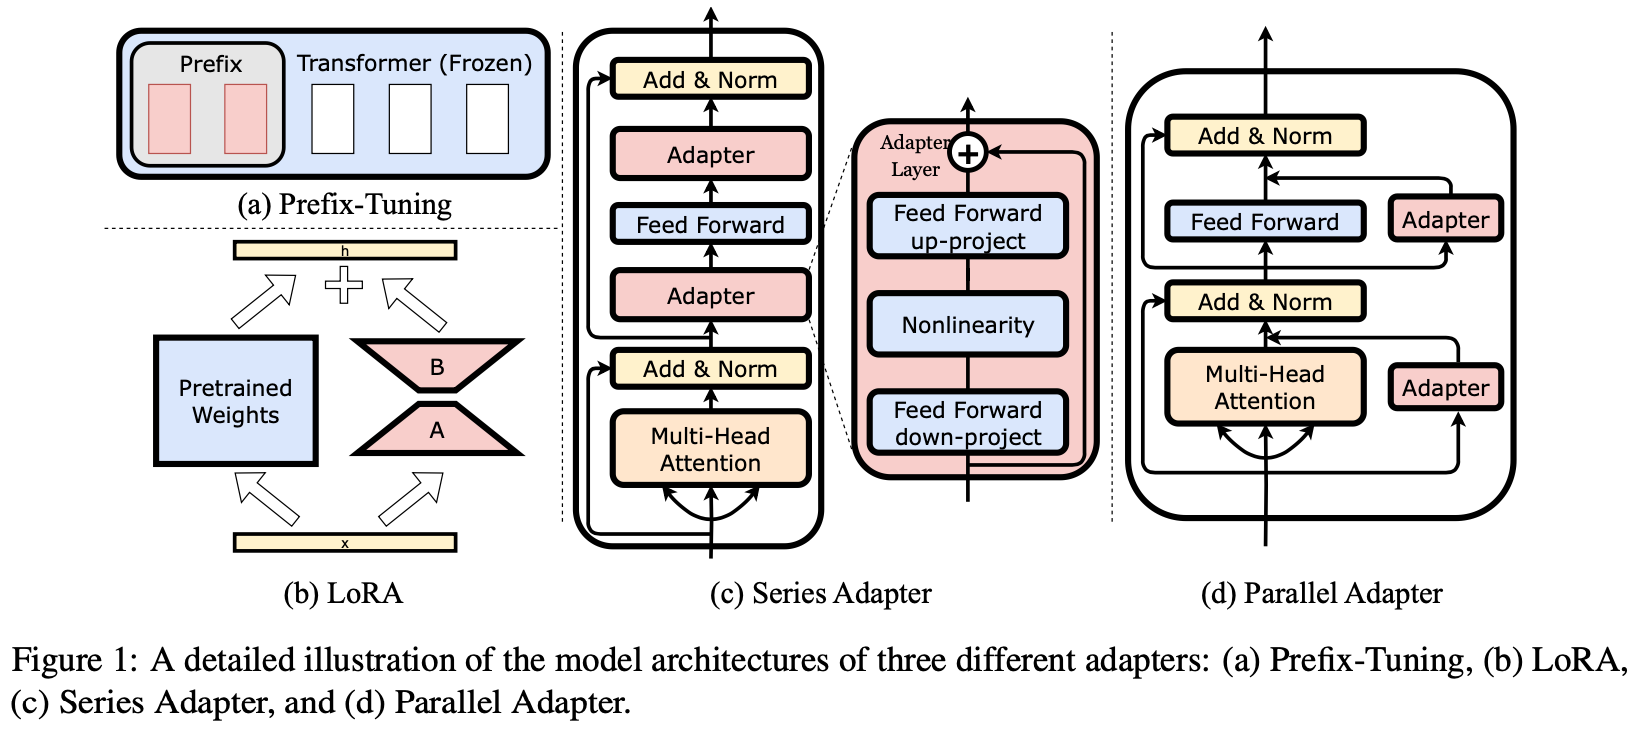

In [10]:
Image('NLP_images/adapters.png', width=800)

Q: Use your intuition to speculate on which of the following is more likely to be accurate?
1. PEFT works better when the adapter is applied to a very large LLM.
2. The efficacy of PEFT is independent of the size of the base LLM.

Q: The percentage improvement in performance from PEFT is greater for
1. Large LLMs
2. Small LLMs

(Some hints at these answers are in Tables 3 & 4 of the [LLM-Adapter paper](https://arxiv.org/pdf/2304.01933).)

There is now a LoRA industry that has spawned from these initial results ... read on!


## LongLoRA

https://arxiv.org/abs/2309.12307. For long context LMs. Training on the context length of 8192, this needs 16x computational costs in self-attention layers as that of baseline 2048 models (quadratic complexity is a well known attribute in attention models). LongLoRA uses *sparse local attention* and just a couple of extra lines of code in PyTorch (retains original LoRA architecture). Adapts LLaMA2 7B from 4k context to 100k, or LLaMA2 70B to 32k on a single 8xA100 machine. The paper provides a dataset, LongQA, with 3k long-context QA pairs for supervised fine-tuning (SFT). The graphic below shows perplexity improves, less memory is required, and compute is cheaper/lower.

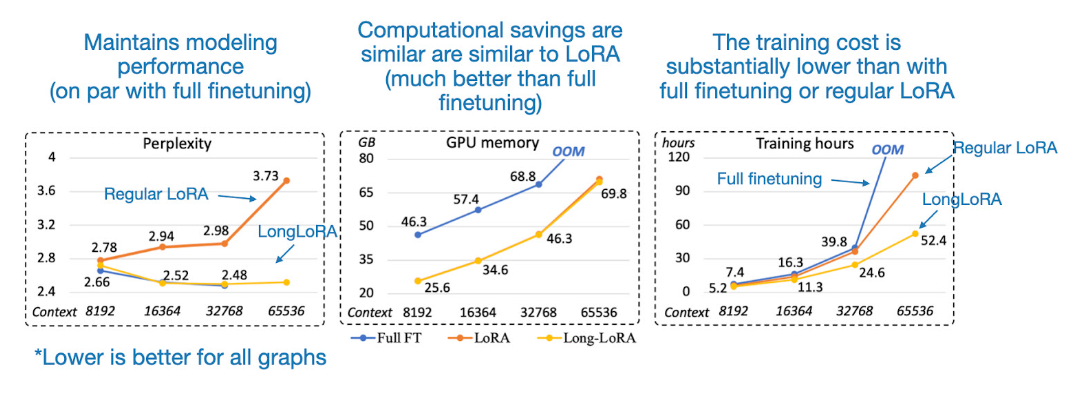

In [11]:
Image('NLP_images/longlora.png', width=800)

Q: Somewhat related fun question about human context windows. What is the average human reading speed in words per minute? Approximately:
1. 100
2. 200
3. 300
4. 400
5. 500

(The answer from the Journal of Memory and Language is discussed [here](https://www.sciencedirect.com/science/article/abs/pii/S0749596X19300786). Look at this after you select an option above.) Does Anthropic use LongLoRA, or some other technique to expand the context window? See the [Model Card](https://www-files.anthropic.com/production/images/Model-Card-Claude-2.pdf). They do not reveal this detail. Claude 2 can handle up to 200K tokens but Anthropic has released only the 100K version.

Q: How does increasing the context window impact performance (e.g., accuracy in a QA task, etc) of the model?
1. Increasing the context window improves model performance
2. Model performance degrades as the context window expands
3. The context window is independent of model performance

For answers: See the [Model Card](https://www-files.anthropic.com/production/images/Model-Card-Claude-2.pdf) for Claude-2 (Figure 8). Also see this paper: https://www.arxiv-vanity.com/papers/2307.03172/. The latter paper tells you that the answer to the question above is a subtle one!


## QA-LoRA

https://arxiv.org/pdf/2309.14717v2.pdf. This is essentially a small modification or improvement over QLoRA (quantized LoRA) that addresses its higher computational efficiency cost — QLoRA saves GPU memory but increases the runtime due to dequantizing the quantized weights of the base model in each forward pass. QA-LoRA, in contrast to QLoRA, quantizes the LoRA (adapter) weights, avoiding a costly conversion of the quantized base model weights back into 16-bit when adding the adapter weights.

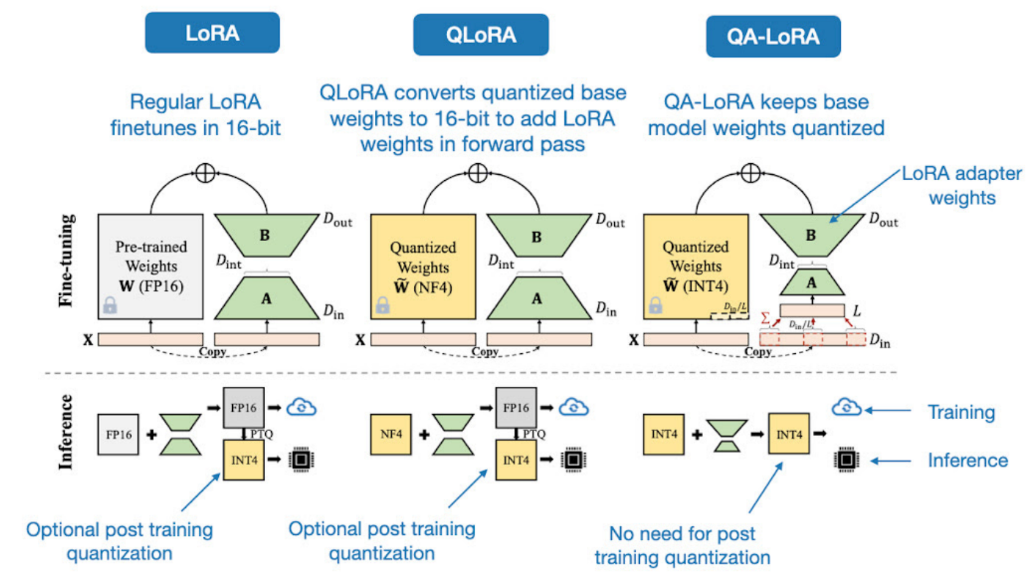

In [12]:
Image('NLP_images/qa_lora.png', width=800)

Q: Does QA-LoRA result in degraded performance versus QLoRA?
1. Yes, QA-LoRA degrades model performance
2. No, QA-LoRA improves performance
3. QA-LoRA has no relative performance difference versus QLoRA but reduces memory requirements

See the paper for an answer, Figure 1 (and several tables).

## VeRA (Vector-based Random matrix Adaptation)

https://arxiv.org/abs/2310.11454. Same as LoRA but some of the weight matrices of the LoRA adapter are randomly generated and then held fixed, while the rest are trained. This remarkably reduces the number of trainable parameters, without degrading performance. As shown below.

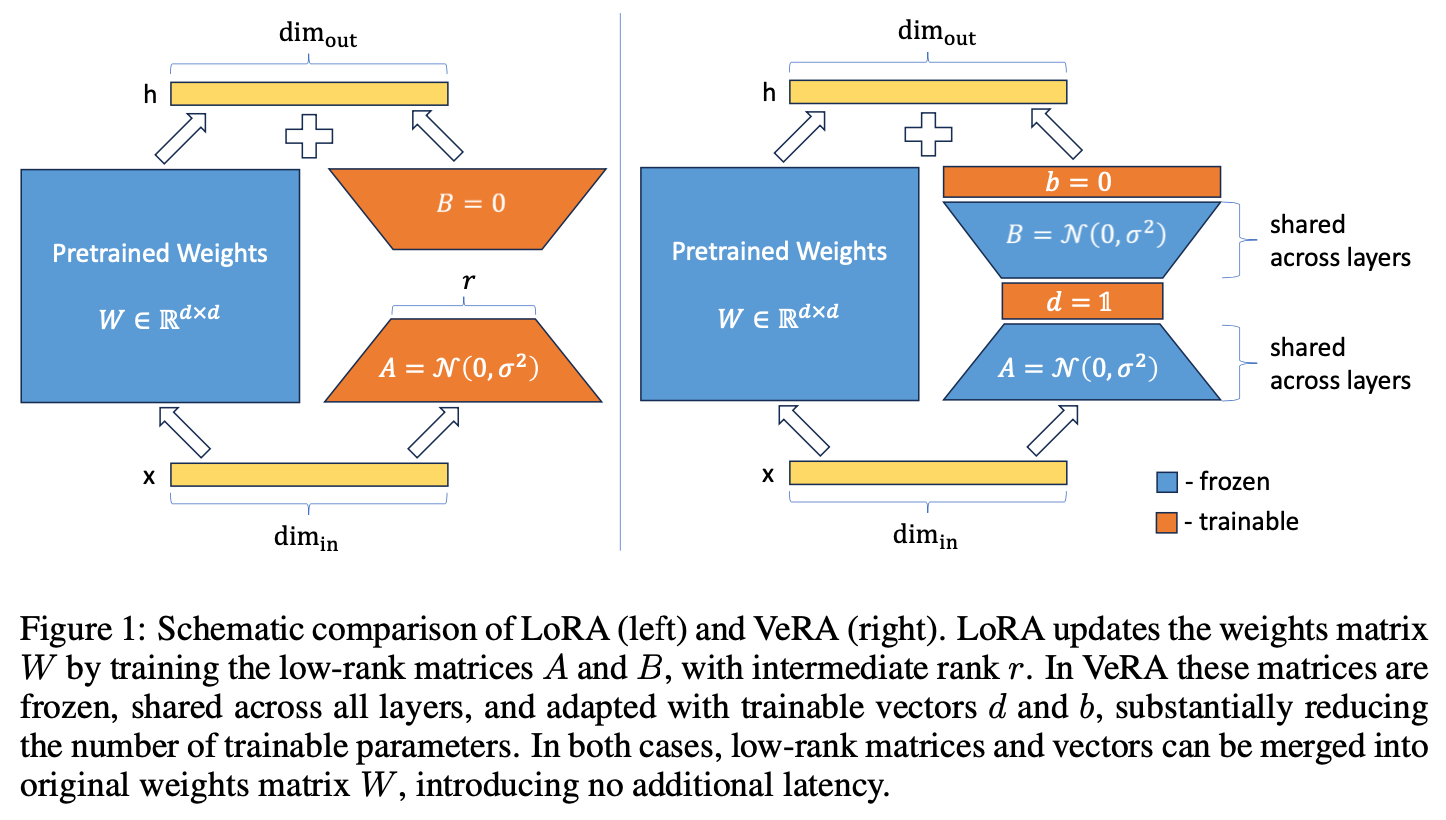

In [13]:
Image('NLP_images/vera.png', width=800)

The intuition seems to be that the original weight matrix size is maintained in LoRA, except that a low rank sparse matrix is added as sidecar. This paper shows that the trainable parameters in the sidecar can be further reduced by randomly generating and fixing some of the parameters. (So we only train the orange layers.)

We now look at **other enhancements** briefly.

## Knowledge Distillation (KD)

The essence of KD is a large "teacher" model that generates synthetic labels that are used to train a smaller "student" model along with the true labels with a combination of loss functions.

There are several key papers on distilling transformer models, particularly BERT:

1. [Distilling the Knowledge in a Neural Network](http://arxiv.org/abs/1503.02531) (an original paper by Hinton, Vinyalis, Dean 2015).

2. [DistilBERT](http://arxiv.org/abs/1910.01108): This is a smaller and faster version of BERT that retains 97% of its language understanding capabilities while being 40% smaller and 60% faster. Key features:
  - Performing knowledge distillation during pre-training rather than for specific tasks;
  - Using a triple loss combining language modeling, distillation, and cosine-distance losses;
  - Training on the same corpus as the original BERT.

3. [TinyBERT](https://aclanthology.org/2020.findings-emnlp.372/): This paper proposed a novel Transformer distillation technique specifically for knowledge distillation of Transformer-based models. Key fatures:
  - A two-stage learning framework with distillation at both pre-training and task-specific stages;
  - Transformer-layer distillation, embedding layer distillation, and prediction layer distillation;
  - Achieving 96.8% of BERT-Base performance on GLUE while being 7.5x smaller and 9.4x faster.

4. [Knowledge Distillation of Transformer-based Language Models Revisited](http://arxiv.org/abs/2206.14366):
  - A comprehensive analysis of knowledge distillation for transformer models. It explains a unified KD framework and conducts extensive experiments on various aspects of distillation. This is a good read to cover all aspects of KD.

5. References to other papers: https://github.com/lhyfst/knowledge-distillation-papers

A useful graphical representation is shown below (Image source: @prakhargannu, towardsdatascience.com); see also this [article](https://hkalabs.com/blog/how-to-read-deep-learning-papers-for-a-busy-or-lazy-man-paper-001/) with a neat approach to read and understand machine learning papers.  


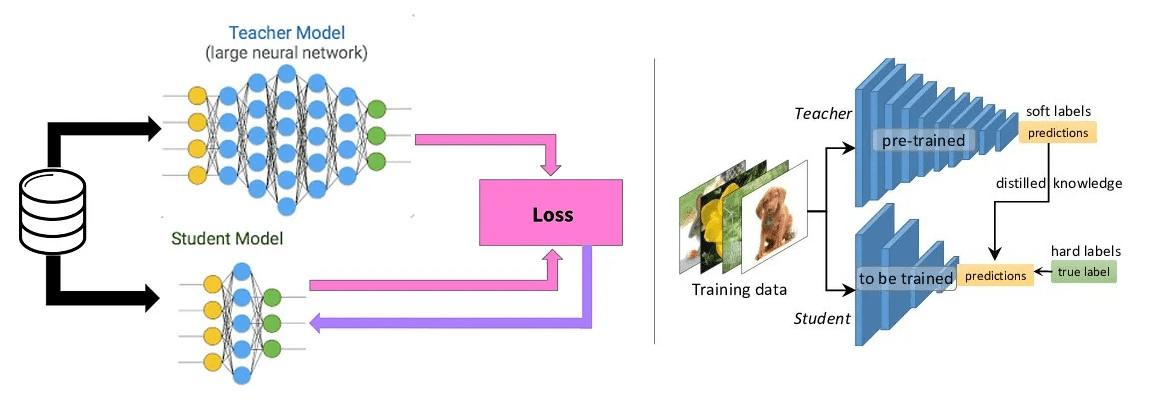

In [14]:
Image('NLP_images/knowledge_distillation.png', width=800)

## LLM Distillation

This is based on, but slightly different from the original KD setting.

LLMs are generally good at answering a wide range of queries, but they hallucinate, and suffer from low accuracy in responses which are generated with high latency. One approach to addressing latency and accuracy is LLM distillation. By distilling a "teacher" LLM using task-specific queries, a smaller  "student" LM can be trained to be more accurate and provide faster responses (speed of response is often measured by the time to first token and the average time per token). And of course, distillation brings cost benefits.

The methodology is simple and transparent. Generate questions and answers from the teacher model and use these to fine tune a smaller student model. (Be careful not to violate the terms of use of LLMs, as many of the closed models do not allow you to use them to generate synthetic data.) See the figures below for a graphical view---the second one signifies knowledge transfer from the teacher LLM to the student LLM.

Compared to traditional KD, here the goal is more about eliciting and transferring specific knowledge from a large LLM to a smaller one, while improving its abilities on specialized tasks. I like to make an analogy to oversampling where the same knowledge is oversampled to make the model more accurate. We just have more data that is in-distribution, and it helps the student model get better, almost like a student doing more practice problems to hone skills. The oversampling meme here brings a connection to data augmentation (DA) where additional context-rich labels are generated for domain-specific training of the student model (as discussed in Ref 1 below).



References for detailed reading:

1. A Survey on Knowledge Distillation of Large Language Models (Xu et al, 2024): http://arxiv.org/abs/2402.13116

2. Distillation with Explanations from Large Language Models (Zhang et al, 2024): https://aclanthology.org/2024.lrec-main.449

3. https://snorkel.ai/llm-distillation-demystified-a-complete-guide/

4. https://github.com/Tebmer/Awesome-Knowledge-Distillation-of-LLMs

5. https://github.com/predibase/llm_distillation_playbook


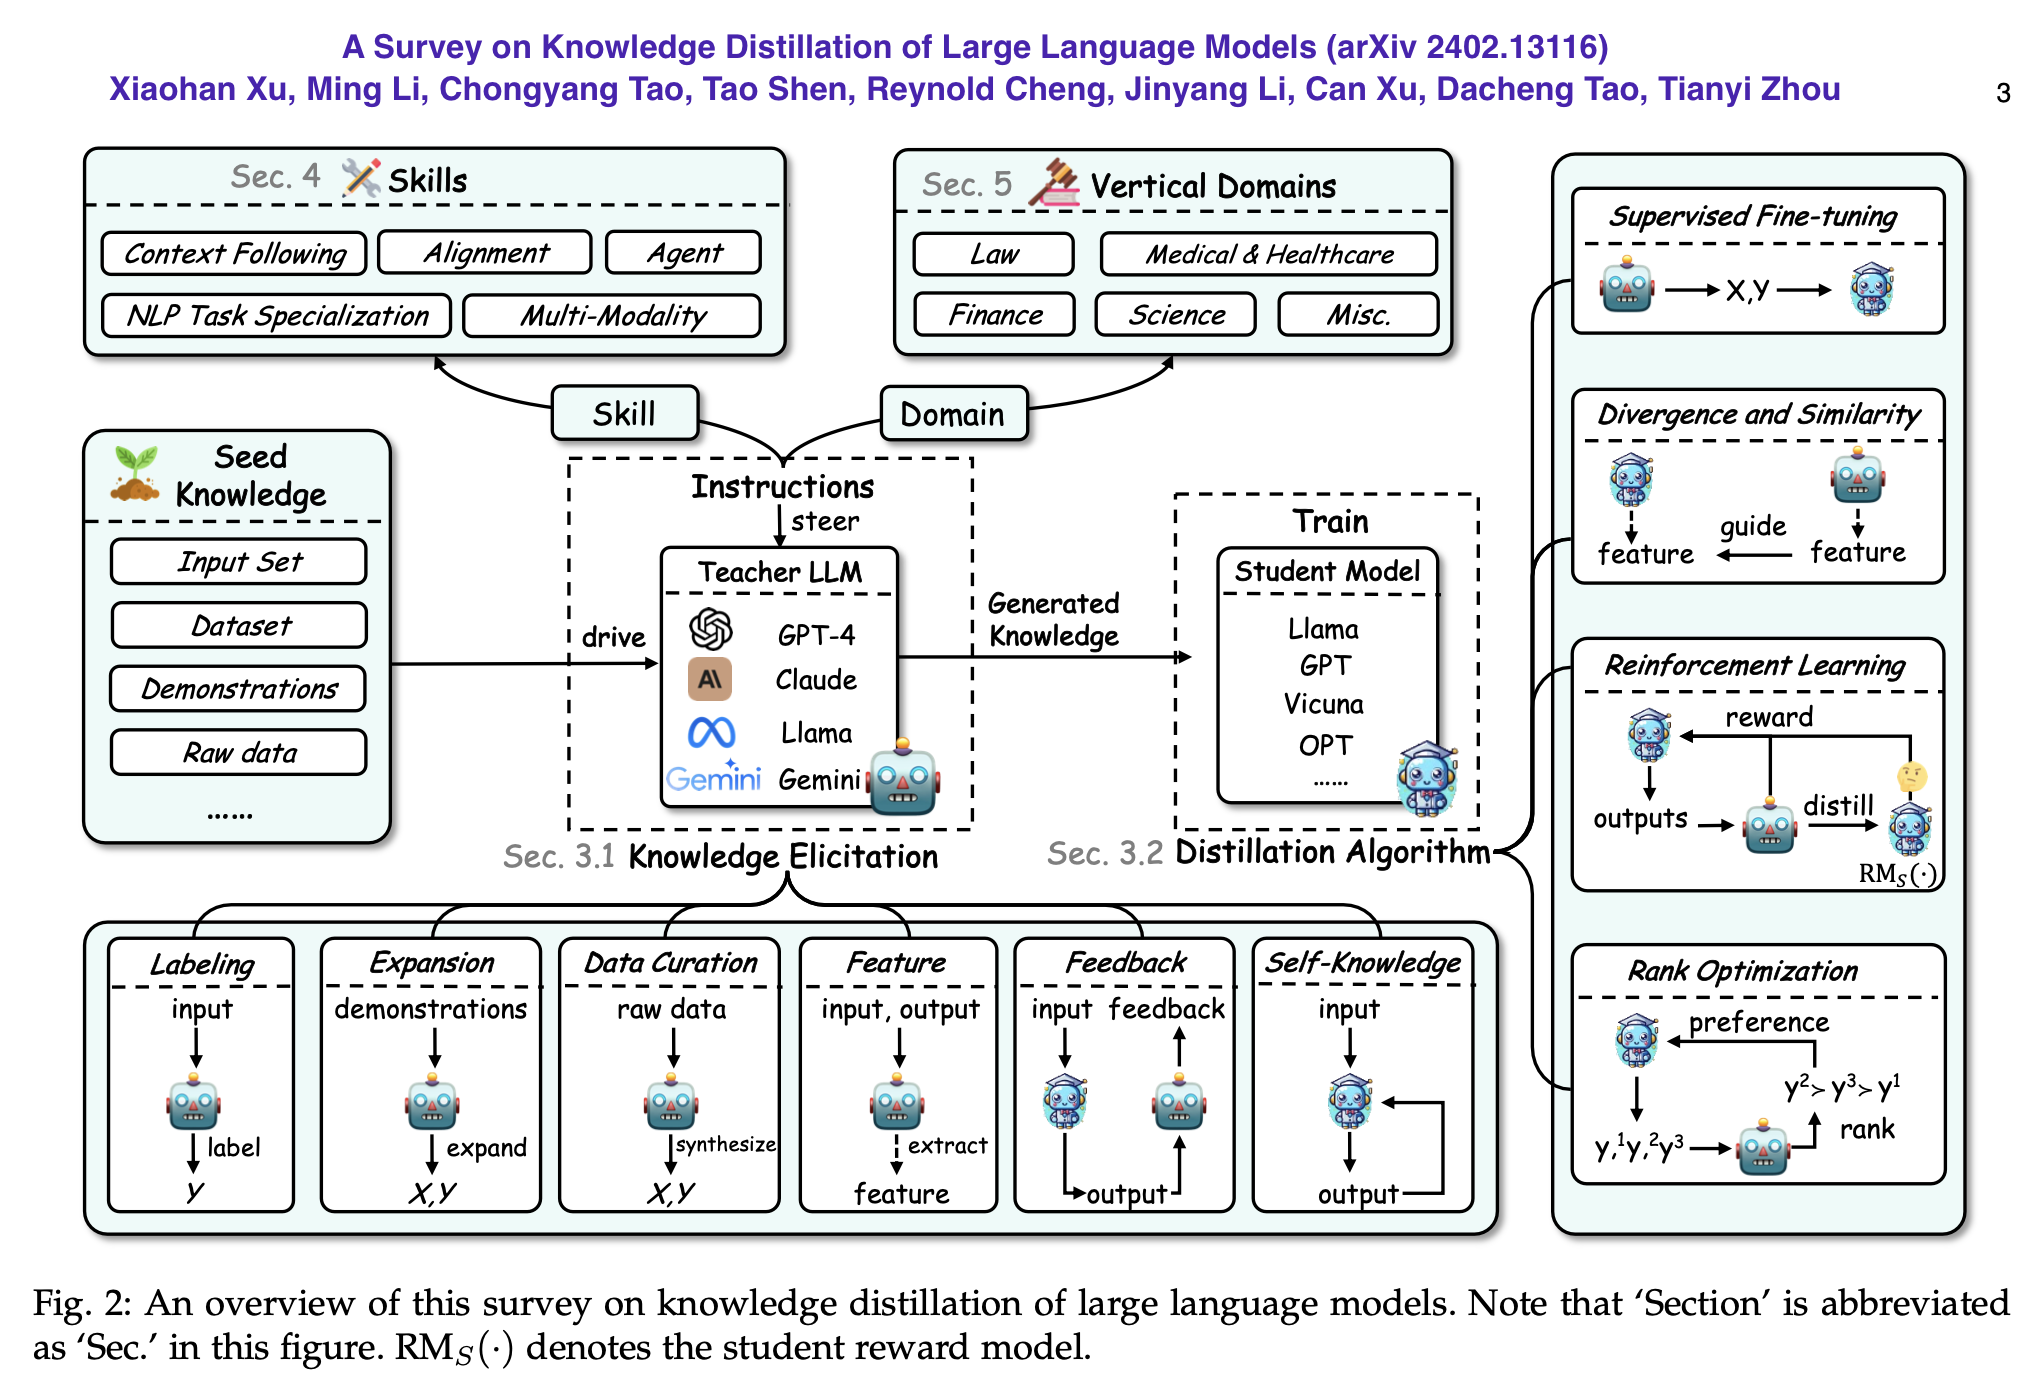

In [15]:
Image('NLP_images/KD_LLMs.png', width=800)

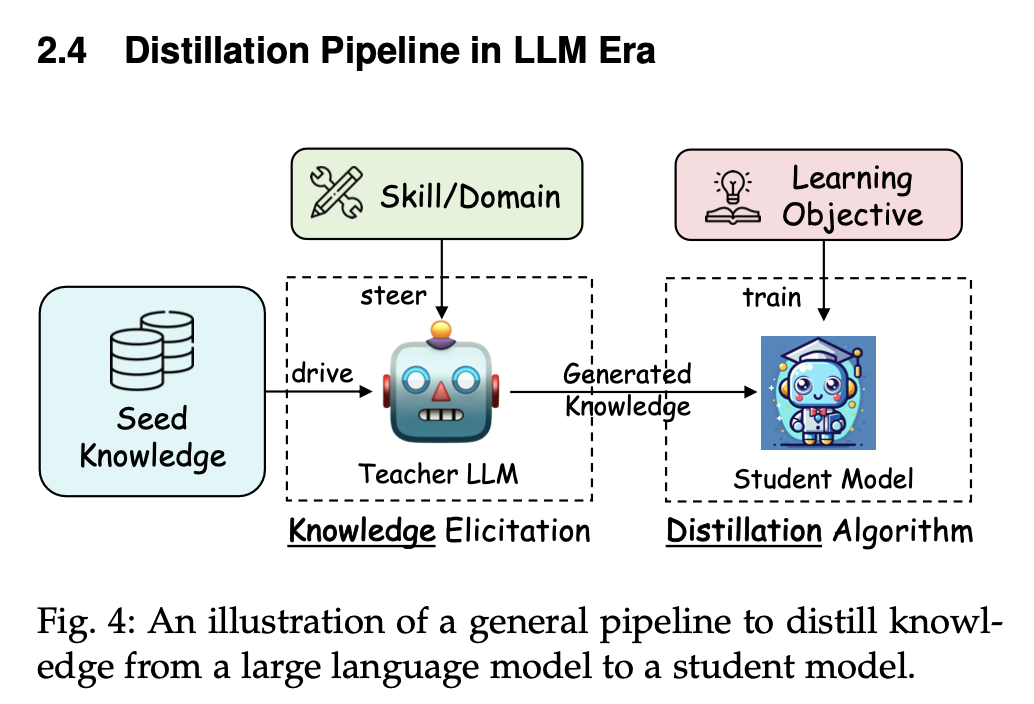

In [16]:
Image('NLP_images/KD_LLMs_2.png', width=800)

## Distillation (step by step)

http://arxiv.org/abs/2305.02301. This is a new approach to distillation. Usually distillation is a process by which data is passed through the larger (teacher) model and the smaller (student) model’s weights are trained to reproduce the output of the larger model layer by layer. This is also easy to do for LLMs in the standard way.

In a slightly different approach, known as step-by-step (SbS) distillation, think of steps as logic statements in a chain of thought (CoT) process internal to the LLM. The original prompts are used to generate CoT data from the teacher LLM and then passed to the smaller student LLM with the CoT, so that the distilled model is trained on more data but with fewer parameters. In short, each step in the CoT is additional data on which the student model is trained.

Benefits are (i) a smaller performant LLM, (ii) less training data is needed, (iii) works with labeled and unlabeled datasets.

## ZEPHYR: Direct Distillation of LLM Alignment

http://arxiv.org/abs/2310.16944. Produces a smaller language model that is aligned to user intent. Uses preference data from AI Feedback (AIF). Responses are ranked by a teacher model, distilled
direct preference optimization (dDPO) is applied to learn a chat model with significantly improved intent alignment (no RL/PPO required). The approach requires only a few hours of training without any additional sampling during fine-tuning. ZEPHYR- 7B surpasses Llama2-chat-70B (RLHF-tuned) on MT Bench (https://arxiv.org/abs/2306.05685, https://github.com/lm-sys/FastChat/tree/main/fastchat/llm_judge) and AlpacaEval (https://tatsu-lab.github.io/alpaca_eval/), both of which are conversational benchmarks.

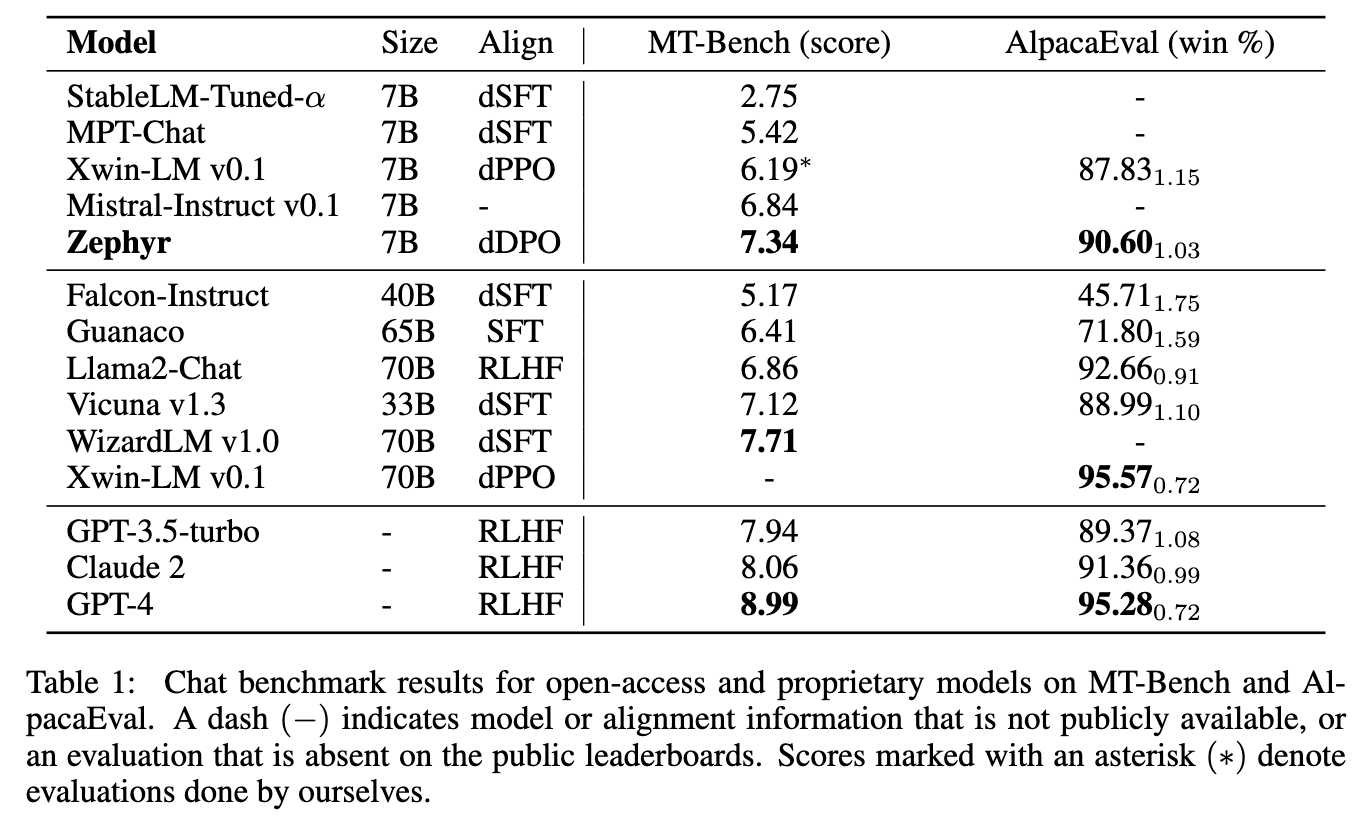

In [17]:
Image('NLP_images/zephyr.png', width=800)

Tutorials: https://github.com/huggingface/alignment-handbook. The Zephyr approach combines DPO with RLAIF, the latter which we look at next.

## Reinforcement Learning with AI Feedback (RLAIF)

http://arxiv.org/abs/2309.00267.

Replace the human evaluator by an LLM. On the task of summarization, human evaluators prefer text generated from both RLAIF and RLHF over a baseline supervised fine-tuned model in ~70% of cases.

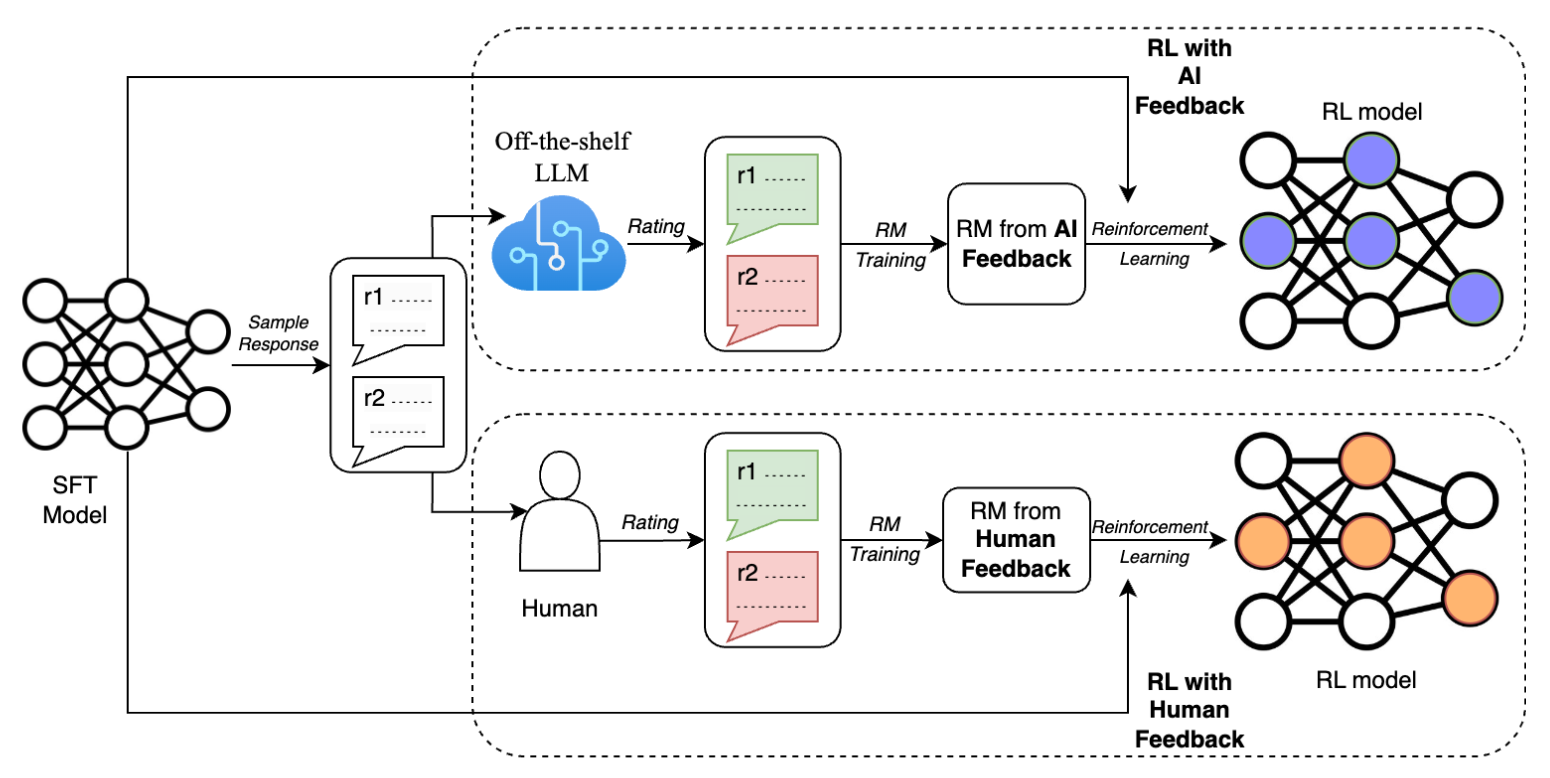

In [18]:
Image('NLP_images/rlaif.png', width=800)

Q: Do you think we will get the same result if we implemented DPO with AI feedback?
1. Yes, DPO will work just as well with AI feedback
2. No, DPO will degrade in performance if human labeling is replaced with LLM labels

## Reinforced Self-Training (REST)

https://arxiv.org/abs/2308.08998 (from DeepMind). A weird combination of RLHF and DPO. Steps:
- (1) Fine tune the LLM from a human annotated dataset (DPO).
- (2) Also train a reward function as done before in RLHF.
- (3) Use the LLM from (1) to generate samples and evaluate it with the reward function in (2) to create additional data (denoted as the Grow step), which is then filtered (use high reward examples) and used to repeat fine-tuning in step (1), denoted the Improve step (at every iteration, use all the data but filtered with increasing reward thresholds). This looks like offline RL, or a growing batch RL algorithm.


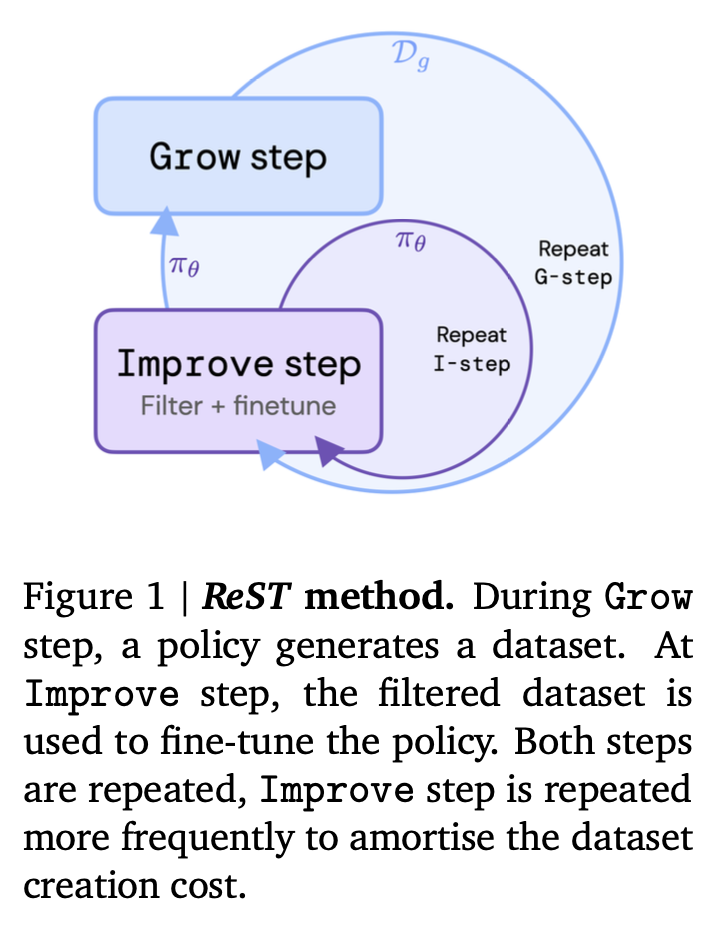

In [19]:
Image('NLP_images/rest1.png', width=600)

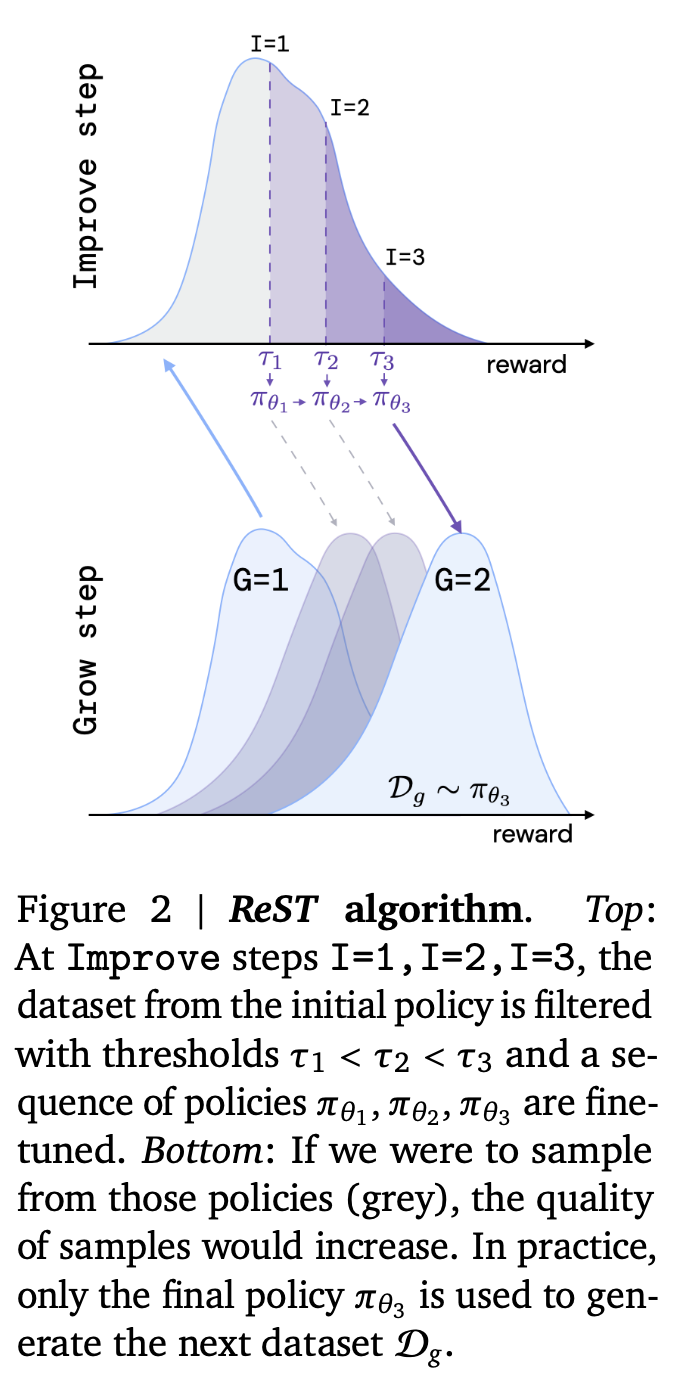

In [20]:
Image('NLP_images/rest2.png', height=700)

Q: Which of the following is accurate?
1. Adding Grow steps raises model reward scores
2. Adding Improve steps raises model reward scores
3. Both of the above

## A Quick List of Other LLM Enhancements

1. **Rank Responses to align Human Feedback (RRHF)**. https://arxiv.org/abs/2304.05302. Instead of PPO in RLHF, this uses (self) ranking loss which is more stable and easier to implement than an approach that uses policy functions that need to be trained as well.  

2. **Reward rAnked FineTuning (RAFT)**. https://arxiv.org/abs/2304.06767. Again, avoids some of the usual issues of RL, by detecting higher-quality samples and retraining only on those in a second pass. RAFT can be interpreted as a particular case of ReST which uses only one Improve step for each Grow step, and relies on a filtering threshold which is a fixed quantile of the empirical distribution of the rewards of the current samples.

3. **Curriculum Learning**. https://arxiv.org/abs/2308.12202. The idea is to train an LLM gradually on simple tasks and then harder ones, in the manner humans learn. Finding is that these methods are brittle, outperformed solely using Adam with well-selected hyperparameters.

4. **Platypus**: Quick, Cheap, and Powerful Refinement of LLMs. https://arxiv.org/abs/2308.07317. Creates a new dataset named Open-Platypus curated for efficient and accurate tuning; uses LoRA; the 13B Platypus model can be trained on a single A100 GPU using 25k questions in 5 hours.

5. **Self-Alignment with Instruction Backtranslation**. https://arxiv.org/abs/2308.06259. Start with a LM finetuned on a small amount of seed data, and a given web corpus, then construct training examples by generating instruction prompts for web documents (self-augmentation), and then selecting high quality examples from among these candidates (self-curation). This data is then used to fine-tune a stronger model.

6. **Rewindable Auto-regressive INference (RAIN)**. “Language Models Can Align Themselves without Finetuning”,  https://arxiv.org/abs/2309.07124. Algorithm does (i) self-evaluation and (ii) rewinding an LLM's response. On Llama 30B, using Anthropic’s Helpfulness and Harmlessness (HH) dataset, RAIN improves from 82% to 97% on the harmlessness scale, keeping helpfulness the same. Mirrors human behavioral patterns: contemplating, weighing, and reflecting on the consequences before speaking.

7. **Decoding by Contrasting Layers (DoLa)**. https://arxiv.org/abs/2309.03883. DoLa’s hallucination management strategy involves prioritizing information from deeper layers of the model while downplaying that from intermediate or shallower ones. This contrastive decoding approach enhances the LLM’s factual knowledge without the need for external knowledge retrieval or further fine-tuning.

8. **OctoPack**. https://arxiv.org/abs/2308.07124. Instruction Tuning Code Large Language Models. The idea is clever, it uses the Git commit messages for instruction tuning. Provides a dataset called CommitPack: 4 terabytes of Git commits across 350 programming languages. And HumanEvalPack, expanding the HumanEval benchmark to a total of 3 coding tasks (Code Repair, Code Explanation, Code Synthesis) across 6 languages (Python, JavaScript, Java, Go, C++, Rust).

9. **Agents**: Why use RAG when APIs are better? Calling a search engine or a tool is usually best. As an example see this paper, “GPT Can Solve Mathematical Problems Without a Calculator” https://arxiv.org/abs/2309.03241.

For a nice blog on instruction fine-tuning see: https://magazine.sebastianraschka.com/p/instruction-pretraining-llms



## Attention Improvements: Sliding Attention

**Mistral**. https://arxiv.org/abs/2310.06825 Github: https://github.com/mistralai/mistral-src. This model saves memory by using “sliding window attention”. This is a fancy word for fixed attention windows, but makes sense when dealing with very large context windows. For example, when the context window is 100K tokens, but we apply a sliding window of 4096 tokens, we get huge parameter and memory savings. This is explained nicely in the cited Githib repo which credits the sliding attention idea to earlier work on much smaller input context windows: [1]Generating Long Sequences with Sparse Transformers, Child et al. 2019, [2] Longformer: The Long-Document Transformer, Beltagy et al. 2020. Mistral comes in size 7B, standard and instruct-tuned. Here is a schema of the sliding window based attention.


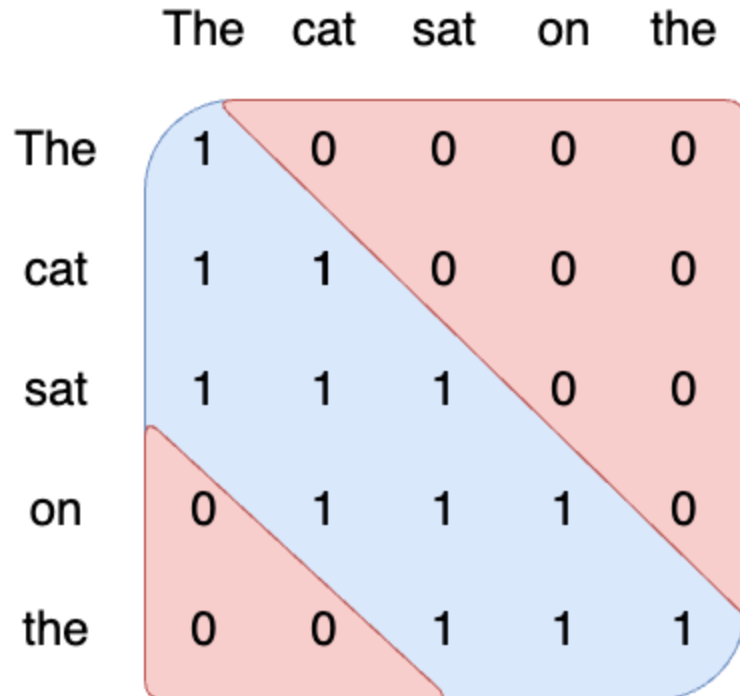

In [21]:
Image('NLP_images/sliding_attention.png', width=400)

Also it can access bigger context in a hierarchical manner down through the layers, so it does not totally ignore the larger context window.

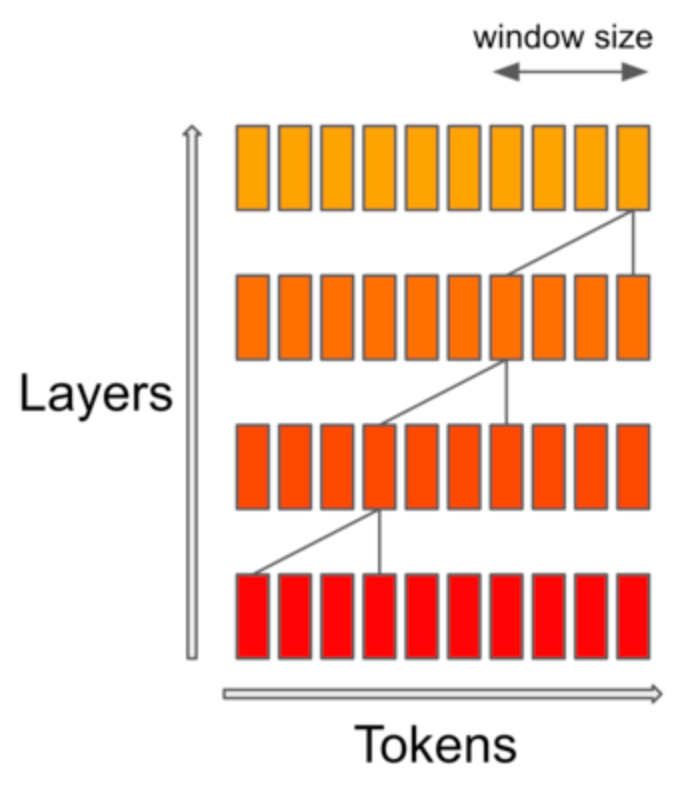

In [22]:
Image('NLP_images/hierarchical_context.png', width=400)

It has also been claimed that the reason it performs better than Llama models is because of carefully curated training data, but no disclosures have been made, so this is pretty much hearsay. Though some of the favorable comparisons with Llama2 (7B/13B) have been [criticized for test data leakage](https://www.reddit.com/r/LocalLLaMA/comments/16twtfn/comment/k2hr0yl/) into the pretraining data.

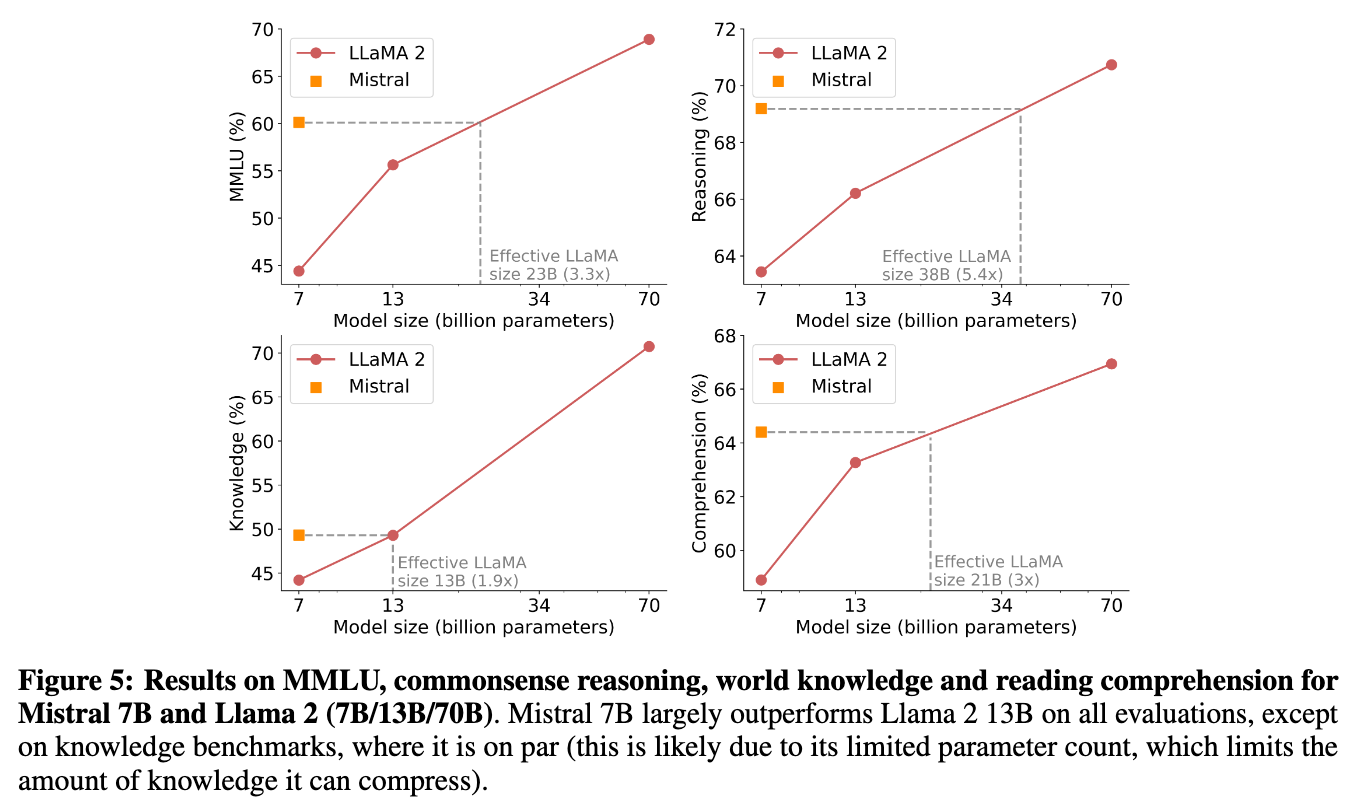

In [23]:
Image('NLP_images/mistral7b.png', width=800)

- Mistral is an open model with released weights. It is not released with training data. As such it is not truly open source. Percy Liang at Stanford has compared the release of open models to being similar to releasing code binaries for free use, but not releasing the source code.
- Mistral-7B is the basis for fine tuning Zephyr-7B.



## Attention Improvements: Flash Attention

http://arxiv.org/abs/2205.14135. Time and memory complexity of attention mechanisms are quadratic in sequence length. This is addressed by sliding sequence length in Mistral. Flash Attention is an algorithm that reorders the attention computation and leverages classical techniques (tiling, recomputation) to significantly speed it up and reduce memory usage from quadratic to linear in sequence length. Tiling loads blocks of inputs from HBM (GPU memory) to SRAM (fast cache), performs attention with respect to that block, and updates the output in HBM (high bandwidth memory). Not writing the large intermediate attention matrices to HBM reduces the amount of memory reads/writes, which brings 2-4x wallclock time speedup.

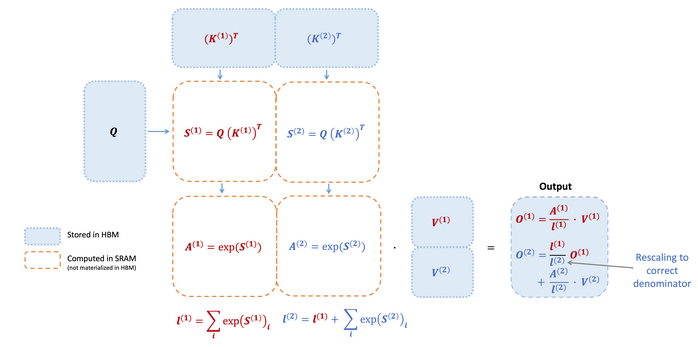

In [24]:
Image('NLP_images/flash_attention.png', width=800)

Think of this as a IO-based idea being ported to transformers. (Not surprising since the authors of the paper come from the IO tradition.) The group at Stanford has released [Flash Attention-2](https://hazyresearch.stanford.edu/blog/2023-07-17-flash2), which is a 2x speedup over v1.

Q: Many of these papers are truly open source, where the dataset, training scheme, and parameters are released. What do you expect to see more of going forward? Open models or open-source models?
1. Open models
2. Open-source models


## Attention Improvements: Paged Attention

Paged Attention, https://vllm.ai/. vLLM achieves up to 24x higher throughput compared to HF and up to 3.5x higher throughput than TGI. PagedAttention effectively manages attention keys and values.



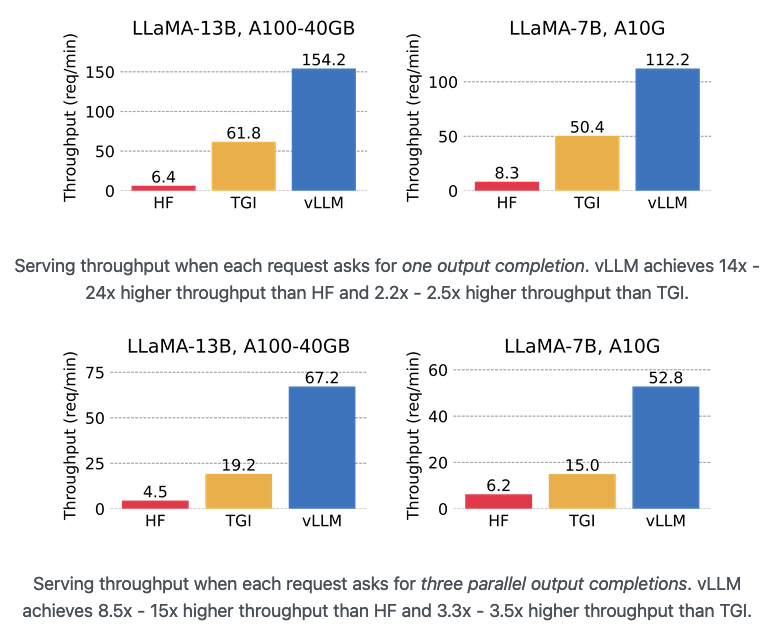

In [25]:
Image('NLP_images/paged_attention_results.png', width=800)

Unlike the traditional attention algorithms, Paged Attention allows storing continuous keys and values in non-contiguous memory space. Specifically, Paged Attention partitions the KV (key-value) cache of each sequence into blocks, each block containing the keys and values for a fixed number of tokens. During the attention computation, the Paged Attention kernel identifies and fetches these blocks efficiently.

Therefore, PA does the trick by improving memory management of the key and value tensors in the KV cache which is the main bottleneck in GPU memory.


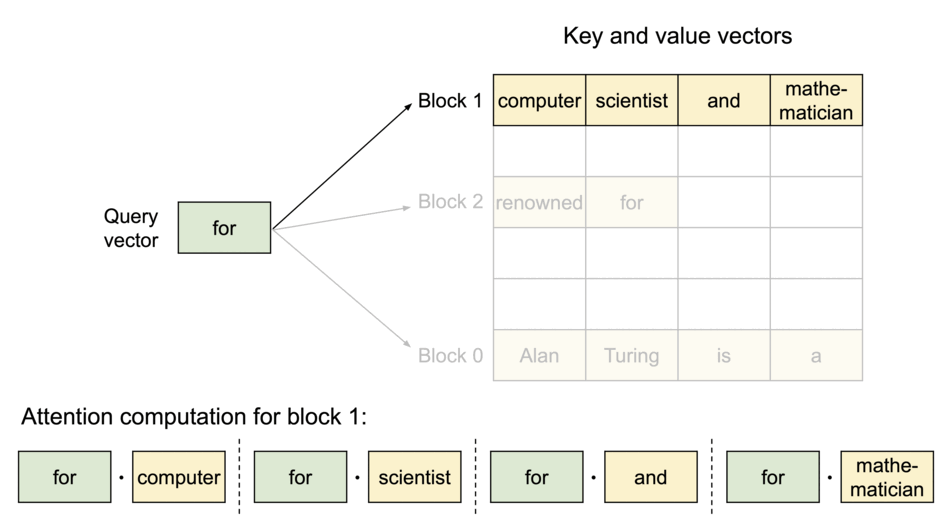

In [26]:
Image('NLP_images/paged_attention_kv.png', width=800)

You can think of the attention mechanism as a matchmaking service for words. Each word makes a checklist (called a query vector) describing the characteristics of words it is looking for. Each word also makes a checklist (called a key vector) describing its own characteristics. The network compares each key vector to each query vector (by computing a dot product to get the value vector) to find the words that are the best match. Once it finds a match, it transfers information from the word that produced the key vector to the word that produced the query vector.

A similar idea is presented in sequence parallelism (http://arxiv.org/abs/2105.13120). The attention calculation is distributed across GPUs. It is part of NVIDIA’s [Nemo](https://developer.nvidia.com/blog/nvidia-ai-platform-delivers-big-gains-for-large-language-models/) framework.

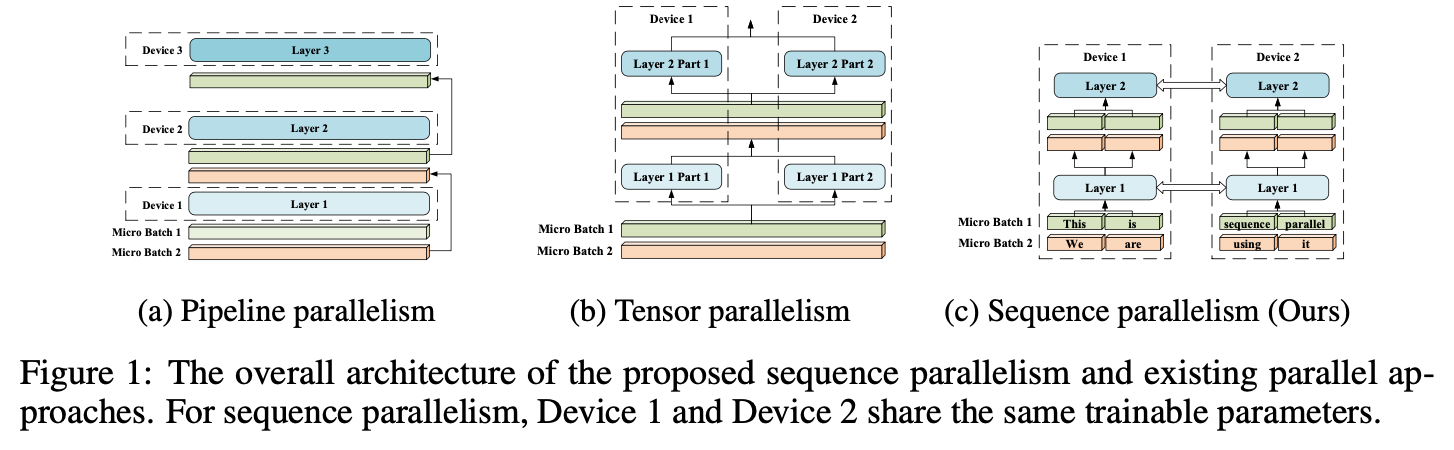

In [27]:
Image('NLP_images/sequence_parallelism.png', width=800)

## Summary

As you can imagine, this is just the tip of a massive iceberg, it is becoming impossible to keep up with all the new research coming out. At ICLR 2023 there were 75 submissions only on RLHF! On https://openreview.net/ there were 159 RLHF articles (124 for DPO). Will a clever tool built with Hugging Face make it easier for customers to find the best compatible approach for any use case? Model selection has never been more important given that cost/performance tradeoffs are huge.

All these enhancements complement the usual ways of augmenting LLMs with RAG, fine-tuning, prompt engineering, and evaluations, as described here: https://thesequence.substack.com/p/guest-post-how-to-maximize-llm-performance
